In [18]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from math import pi,cos,sin,tan
import handcalcs.render
import cmath

In [19]:
dirfig = "D:/tex/lec/drives/Drivesbook/figures/"
dirfig2 = "E:/tex/lec/drives/Drivesbook/figures/"

In [20]:
# Machine parameters

#Dictionary - one of the data structures used in Python 
#Name of_dictionary = {'name of variable': value, "nameof2ndvariable": value2}
mach_mc = {"rs": 0.009, "rr": 0.007, "lh": 4.14, "ls": 4.21, "lr": 4.21, "tmech":509.6}

mach_mb = {"rs": 0.0185, "rr": 0.0132, "lh": 3.81, "ls": 3.9, "lr": 3.9, "tmech":397.31}

mach_ma = {"rs": 0.015, "rr": 0.04, "lh": 2.31, "ls": 2.35, "lr": 2.35, "tmech":596.9}

#mach_my = {"rs": 0.016, "rr": 0.05, "lh": 2.31, "ls": 2.35, "lr": 2.35, "tmech":596.9}

mach_BM = {"rs": 0.0426, "rr": 0.02113, "lh": 2.252, "ls": 2.252+0.078, "lr": 2.252+0.1052, "tmech":200.}

print(mach_mb["rs"])

#defining parmeters for a T-equivalent circuit
def mach_Tpara(dict):
    rs = dict["rs"]
    rr = dict["rr"]
    lh = dict["lh"]
    ls = dict["ls"]
    lr = dict["lr"]
    sig= 1-(lh*lh)/(lr*ls)
    kr=lh/lr
    sigs= ls- lh
    sigr = lr - lh
    lsigss = sigs*lh
    lsigrr = sigr*lh
#     print(ls)
    return rs,rr,lh,ls,lr,sig,lsigss,lsigrr

0.0185


In [21]:
def plot_cvector(C):
    xe = C.real
    ye = C.imag
    x0 = 0.0
    y0 = 0.0
    return [x0,y0,xe,ye]

#### Steady State model of Doubly fed IM
\begin{align}
\vec{v}_s & = r_s\vec{i}_s + j\omega_sl_s\vec{i}_s + j\omega_sl_h\vec{i}_r\\
\vec{v}_r &= r_r\vec{i}_r + js\omega_sl_r\vec{i}_r + js\omega_sl_h\vec{i}_s\\
\frac{\vec{v}_r}{s} &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r + j\omega_sl_h\vec{i}_s
\end{align}
Neglecting the drop in stator resistance we can get 
\begin{align}
\vec{v}_s & = j\omega_sl_s\vec{i}_s + j\omega_sl_h\vec{i}_r\\
\vec{i}_s & = - \frac{l_h}{l_s}\vec{i}_r + \frac{1}{j\omega_sl_s}\vec{v}_s\\
\end{align}
Substiuting in rotor equation, we get
\begin{align}
\frac{\vec{v}_r}{s} &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r + j\omega_sl_h\vec{i}_s\\
\frac{\vec{v}_r}{s} &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r + j\omega_sl_h\left[ - \frac{l_h}{l_s}\vec{i}_r + \frac{1}{j\omega_sl_s}\vec{v}_s \right]\\
\frac{\vec{v}_r}{s} &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r - j\omega_s\frac{l^{2}_{h}}{l_s}\vec{i}_r + \frac{l_h}{l_s}\vec{v}_s\\
\frac{\vec{v}_r}{s}-\frac{l_h}{l_s}\vec{v}_s &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r\left(1 - j\omega_s\frac{l^{2}_{h}}{l_rl_s}\right) \\
\frac{\vec{v}_r}{s}-\frac{l_h}{l_s}\vec{v}_s &= \frac{r_r}{s}\vec{i}_r + j\omega_s\sigma l_r\vec{i}_r\\
\vec{i}_r & = \frac{\frac{\vec{v}_r}{s}-\frac{l_h}{l_s}\vec{v}_s}{\frac{r_r}{s} + j\omega_s\sigma l_r}
\end{align}

#### Stator power 
is given by 
\begin{align}
p_s &= \Re\{\vec{v}^{*}_s\cdot\vec{i}_s\}
\end{align}
Power given to air gap will be based on active power consumed on rotor side 
\begin{align}
p_{ag} &= \Re\left[\frac{l_h}{l_s}\vec{v}^{*}_s \cdot \vec{i}_r\right]
\end{align}
Active power at rotor terminals 
\begin{align}
p_r &= \Re\left[\vec{v}^{*}_r\cdot\vec{i}_r \right]
\end{align}

In [22]:
#For machine given above
rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_ma)

In [23]:
cmath.rect(1,pi/3)

(0.5000000000000001+0.8660254037844386j)

In [24]:
#Condistion small slip
sx = 1e-5
vs = complex(0,1.0)
ws = 1.0
vrbysx = complex(-0.1,1.2)
zr = complex(rr/sx,ws*sig*lr)
#------------------------
ir0 = (vrbysx - vs*lh/ls)/zr
is0 = vs/complex(0,ws*ls) - lh*ir0/ls
#------------------------------------------
#stator power 
Ss = np.conj(vs)*is0
Ps = Ss.real
print("Rotor impedence = {0:3.2f}".format(zr))
print("Effective voltage on system = {0:3.2f}".format(vrbysx - lh*vs/ls ))
print('no load rotor currentr ir = {0:3.2f}'.format(ir0))
print('no load stator currentr is = {0:3.2f}'.format(is0))
#------------------------------------------------------
print("Real power drawn from stator = {0:3.2f}".format(Ps))

Rotor impedence = 4000.00+0.08j
Effective voltage on system = -0.10+0.22j
no load rotor currentr ir = -0.00+0.00j
no load stator currentr is = 0.43-0.00j
Real power drawn from stator = -0.00


In [25]:
def ss_DFIG(mach_dict,s,vrm,vrang):
    """Takes following inputs
       mach_dict: dictionary of machine parameters
       s : slip 
       vrm : rotor voltage magnitude in per-unit
       vrang : phase angle of rotor voltage with respect to stationary alpha axis
    """
    #get parameters
    rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_dict)
    #model
    ws = 1.0
    sp = rr/(ws*(lsigss + lsigrr))
    sx = s
    vs = complex(0,1.0)
    vrmag = sx*np.abs(vs)*lh/ls
    vrbysx = cmath.rect(vrmag/sx,vrang)
    zr = complex(rr/sx,ws*sig*lr)
    #------------------------
    ir1 = (vrbysx - vs*lh/ls)/zr
    is1 = vs/complex(0,ws*ls) - lh*ir1/ls
    #------------------------------------------
    Ss = vs*np.conj(is1)
    Ps = Ss.real
    Sr = vr*np.conj(ir1)
    Pr = Sr.real
    #--------------------------------------------
    print("Real power drawn from stator = {0:3.2f}".format(Ps))
    print("Power Factor at stator = {0:1.3f}".format(np.abs(Ps)/np.abs(Ss)))
    print("Real power given out of  rotor terminal = {0:3.2f}".format(Pr))
    
    return vs,vrbysx,ir1,is1

In [26]:
def ss_DFIGop(mach_dict,s,vrm,vrang):
    """Takes following inputs
       mach_dict: dictionary of machine parameters
       s : slip 
       vrm : rotor voltage magnitude in per-unit
       vrang : phase angle of rotor voltage with respect to stationary alpha axis
    """
    #get parameters
    rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_dict)
    #model
    ws = 1.0
    sp = rr/(ws*(lsigss + lsigrr))
    sx = s
    vs = complex(0,1.0)
    #vrmag = sx*np.abs(vs)*lh/ls
    if vrm == 0:
        vrbysx = cmath.rect(0,vrang)
    else:
        vrbysx = cmath.rect(vrm,vrang)
    zr = complex(rr/sx,ws*sig*lr)
    #------------------------
    ir1 = (vrbysx - vs*lh/ls)/zr
    is1 = vs/complex(0,ws*ls) - lh*ir1/ls
    #------------------------------------------
    Ss = vs*np.conj(is1)
    Ps = Ss.real
    Sr = vr*np.conj(ir1)
    Pr = Sr.real
    #--------------------------------------------
#     print("Real power drawn from stator = {0:3.2f}".format(Ps))
#     print("Power Factor at stator = {0:1.3f}".format(np.abs(Ps)/np.abs(Ss)))
#     print("Real power given out of  rotor terminal = {0:3.2f}".format(Pr))
    
    return vs,vrbysx,ir1,is1

### Model of Cage IM

In [27]:
def ss_CIMGop(mach_dict,s,vsmag,wsx):
    """Takes following inputs
    models cage indudction motor with, s and vs magnitude as variables ws 
       mach_dict: dictionary of machine parameters
       s : slip 
       vrm : rotor voltage magnitude in per-unit
       vrang : phase angle of rotor voltage with respect to stationary alpha axis
    """
    #get parameters
    rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_dict)
    #model
    ws = wsx
    sp = rr/(ws*(lsigss + lsigrr))
    sx = s
    vs = complex(0,1.0)
    vrmag = sx*np.abs(vs)*lh/ls
    zr = complex(rr/sx,ws*sig*lr)
    zm = complex(0,ws*lh)
    zh = zr*zm/(zr + zm)
    #------------------------
    ir1 = (vrbysx - vs*lh/ls)/zr
    is1 = vs/complex(0,ws*ls) - lh*ir1/ls
    #------------------------------------------
    Ss = vs*np.conj(is1)
    Ps = Ss.real
    Sr = vr*np.conj(ir1)
    Pr = Sr.real
    #--------------------------------------------
#     print("Real power drawn from stator = {0:3.2f}".format(Ps))
#     print("Power Factor at stator = {0:1.3f}".format(np.abs(Ps)/np.abs(Ss)))
#     print("Real power given out of  rotor terminal = {0:3.2f}".format(Pr))
    
    return vs,vrbysx,ir1,is1

In [28]:
s = -0.058
vr = 1.0
vrang = pi/2 + 0.2*(pi/2)
v1,v2,i2,i1 = ss_DFIG(mach_ma,s,1.0,vrang)
v1

Real power drawn from stator = -0.12
Power Factor at stator = 0.999
Real power given out of  rotor terminal = 0.43


1j

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, -0.3037571306409057, 0.9348683202731085]
[0.0, 0.0, 0.4267791319669343, 0.11884513296059829]
[0.0, 0.0, 0.006017108577183794, -0.11682223708041789]


(-1.0, 1.0)

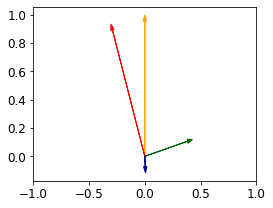

In [29]:
plt.figure(101,figsize = (4,3.2))
plt.rc('font', size = 12)
y1 = plot_cvector(v1)
print(y1)
plt.arrow(y1[0],y1[1],y1[2],y1[3], fc ='orange', ec ='orange', head_width = 0.03, lw = 1, length_includes_head = True)
y2 = plot_cvector(v2)
print(y2)
plt.arrow(y2[0],y2[1],y2[2],y2[3], fc ='r', ec ='r', head_width = 0.03, lw = 1, length_includes_head = True)

y3 = plot_cvector(i2)
print(y3)
plt.arrow(y3[0],y3[1],y3[2],y3[3], fc ='darkgreen', ec ='darkgreen', head_width = 0.03, lw = 1, length_includes_head = True)

y4 = plot_cvector(i1)
print(y4)
plt.arrow(y4[0],y4[1],y4[2],y4[3], fc ='navy', ec ='navy', head_width = 0.03, lw = 1, length_includes_head = True)

# plt.arrow(0,0,Sr.real,Sr.imag, fc ='magenta', ec ='magenta', head_width = 0.03, lw = 1, length_includes_head = True)

# plt.arrow(0,0,Ss.real,Ss.imag, fc ='darkred', ec ='darkred', head_width = 0.03, lw = 1, length_includes_head = True)

# plt.arrow(0,0,Sr.real+Ss.real,-Sr.imag + Ss.imag, fc ='k', ec ='k', head_width = 0.03, lw = 1, length_includes_head = True)
plt.xlim(-1.0,1.0)

In [187]:
#Condition 
"""Machine operate like geneartor"""

sp = rr/(ws*(lsigss + lsigrr))
sx = 0.05
vs = complex(0,1.0)
ws = 1.0
is0 =  vs/(complex(0,ws*ls))
zr = complex(rr,sx*ws*sig*lr)
#------------------------
# ir1 = (vrbysx - vs*lh/ls)/zr
ird =  0.6
irq = 0.5
irn = complex(ird,irq)
is1 = is0 - lh*irn/ls
vrx = zr*irn + complex(0,1)*sx*ws*lh*is1
vro = vrx/sx
#------------------------------------------
#stator power 
Ss = vs*np.conj(is1)
Ssc = np.conj(Ss)
Ps = Ss.real
Sr = vrx*np.conj(irn)
Src = np.conj(Sr)
print(Src.real)
Pr = Sr.real
Qr = Sr.imag
Sro= vro*np.conj(irn)
print("Rotor impedence = {0:3.2f}".format(zr))
print("RotorVoltage on system = {0:3.2f}".format(vrx))
print("RotorVoltage  = {0:3.2f}".format(vro))
print('rotor currentr ir = {0:3.2f}'.format(irn))
print('no load stator currentr is = {0:3.2f}'.format(is0))
print('stator currentr is = {0:3.2f}'.format(is1))
#------------------------------------------------------
print("Real power drawn from stator = {0:3.2f}".format(Ps))
print("Reactive power drawn from stator = {0:3.2f}".format(Ss.imag))
print("Real power given by  rotor terminal = {0:3.4f}".format(Pr))
print("Reactive power given by   rotor terminal = {0:3.2f}".format(Qr))
#----------------------------------------------------------------------
print("Real raw power given by  rotor terminal = {0:3.4f}".format(Sro.real))
print("Reactive raw power given by   rotor terminal = {0:3.2f}".format(Sro.imag))

0.04897446808510639
Rotor impedence = 0.04+0.00j
RotorVoltage on system = 0.08+0.00j
RotorVoltage  = 1.58+0.07j
rotor currentr ir = 0.60+0.50j
no load stator currentr is = 0.43+0.00j
stator currentr is = -0.16-0.49j
Real power drawn from stator = -0.49
Reactive power drawn from stator = -0.16
Real power given by  rotor terminal = 0.0490
Reactive power given by   rotor terminal = -0.04
Real raw power given by  rotor terminal = 0.9795
Reactive raw power given by   rotor terminal = -0.75


(-1.1, 1.1)

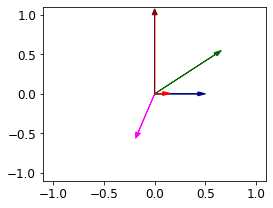

In [182]:
plt.figure(101,figsize = (4,3.2))
plt.rc('font', size = 12)
plt.arrow(0,0,0,1, fc ='darkred', ec ='darkred', head_width = 0.05, lw = 1, length_includes_head = False)
plt.arrow(0,0,is1.real,is1.imag, fc ='magenta', ec ='magenta', head_width = 0.05, lw = 1, length_includes_head =  False)
plt.arrow(0,0,is0.real,is0.imag, fc ='navy', ec ='navy', head_width = 0.05, lw = 1, length_includes_head =  False)
plt.arrow(0,0,vrx.real,vrx.imag, fc ='r', ec ='r',head_width = 0.05, lw = 1, length_includes_head = False)
plt.arrow(0,0,irn.real,irn.imag, fc ='darkgreen', ec ='darkgreen',head_width = 0.05, lw = 1, length_includes_head = False)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)

In [32]:
ss = np.arange(-1.0,1.0,0.001)
vrmag = 1.1
rang = np.arange(0,2*pi,0.01)
sx = -0.05
ira = np.zeros(len(rang), dtype = complex)
isa = np.zeros(len(rang), dtype = complex)
vra = np.zeros(len(rang), dtype = complex)
Psa = np.zeros(len(rang))
Pra = np.zeros(len(rang))

Ssa = np.zeros(len(rang), dtype = complex)
Sra = np.zeros(len(rang), dtype = complex)

for ii,rangn in enumerate(rang):
    vs = complex(0,1.0)
    ws = 1.0
    vra[ii] = cmath.rect(vrmag*sx,rangn)/sx
    zr = complex(rr/sx,ws*sig*lr)
    #------------------------
    ira[ii] = (vra[ii] - vs*lh/ls)/zr
    isa[ii] = vs/complex(0,ws*ls) - lh*ira[ii]/ls
#------------------------------------------
    #stator power 
    Ssa[ii] = vs*np.conj(isa[ii])
    Psa[ii] = Ssa[ii].real
    Sra[ii] = vra[ii]*np.conj(ira[ii])
    Pra[ii] = Sra[ii].real

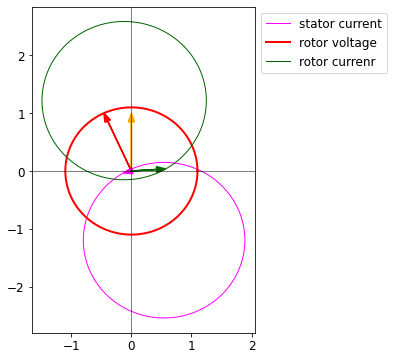

In [33]:
plt.figure(101,figsize = (4,6))
plt.rc('font', size = 12)
plt.arrow(0,0,0,1, fc ='orange', ec ='orange', lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(isa.real,isa.imag, c ='magenta', lw = 1, label = "stator current")
plt.arrow(0,0,isa[200].real,isa[200].imag, fc ='magenta', ec = 'magenta',lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(vra.real,vra.imag, c ='r', lw = 2, label = 'rotor voltage')
plt.arrow(0,0,vra[200].real,vra[200].imag, ec ='r', fc = 'r',lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(ira.real,ira.imag, c ='darkgreen',lw = 1, label = "rotor currenr")
plt.arrow(0,0,ira[200].real,ira[200].imag, ec ='darkgreen',fc = 'darkgreen',lw = 1.5, length_includes_head = True, head_width = 0.1)
# plt.plot(Ssa.real,Ssa.imag, c ='blue',lw = 2)
# plt.plot(Sra.real,Sra.imag, c ='navy',lw = 2)
# plt.xlim(-1.1,1.1)
# plt.ylim(-1.1,1.1)
plt.axhline(0, c = 'k', lw = 0.5)
plt.axvline(0, c = 'k', lw = 0.5)
plt.legend(loc = "upper left", bbox_to_anchor = (1.0,1.0))
# plt.savefig(dirfig2 + "DFIGwithvrchange.pdf", bbox_inches = 'tight', transparent = True)

### Current locus with changing voltage at same slip

In [34]:
ss = np.arange(-1.0,1.0,0.001)
vrmag = 1.1
vrx = np.arange(0,1.1,0.2)
rang = np.arange(0,2*pi,0.01)
sx = -0.05
ira = np.zeros((len(rang),len(vrx)), dtype = complex)
isa = np.zeros((len(rang),len(vrx)), dtype = complex)
vra = np.zeros((len(rang),len(vrx)), dtype = complex)
Ssa = np.zeros((len(rang),len(vrx)), dtype = complex)
Sra =  np.zeros((len(rang),len(vrx)), dtype = complex)


for vv,vn in enumerate(vrx):
    for ii,rangn in enumerate(rang):
        vs = complex(0,1.0)
        ws = 1.0
        vra[ii,vv] = cmath.rect(vn*sx,rangn)/sx
        zr = complex(rr/sx,ws*sig*lr)
    #------------------------
        ira[ii,vv] = (vra[ii,vv] - vs*lh/ls)/zr
        isa[ii,vv] = vs/complex(0,ws*ls) - lh*ira[ii,vv]/ls
#------------------------------------------
        #stator power 
        Ssa[ii,vv] = vs*np.conj(isa[ii,vv])
        Sra[ii,vv] = vra[ii,vv]*np.conj(ira[ii,vv])

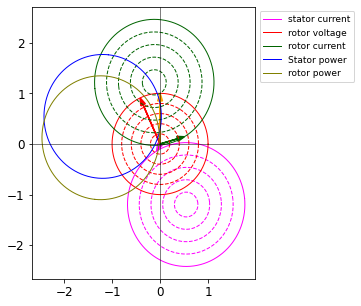

In [35]:
plt.figure(201,figsize = (4,5))
plt.rc('font', size = 12)
plt.arrow(0,0,0,1, fc ='orange', ec ='orange', lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(isa[:,-1].real,isa[:,-1].imag, c ='magenta', lw = 1, label = "stator current")
plt.plot(isa[:,0:-1].real,isa[:,0:-1].imag,ls = "--", c ='magenta', lw = 1)
plt.arrow(0,0,isa[200,-1].real,isa[200,-1].imag, fc ='magenta', ec = 'magenta',lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(vra[:,-1].real,vra[:,-1].imag, c ='r', lw = 1, label = 'rotor voltage')
plt.plot(vra[:,0:-1].real,vra[:,0:-1].imag,ls = '--', c ='r', lw = 1)
plt.arrow(0,0,vra[200,-1].real,vra[200,-1].imag, ec ='r', fc = 'r',lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(ira[:,-1].real,ira[:,-1].imag, c ='darkgreen',lw = 1, label = "rotor current")
plt.plot(ira[:,0:-1].real,ira[:,0:-1].imag,ls = '--', c ='darkgreen',lw = 1)
plt.arrow(0,0,ira[200,-1].real,ira[200,-1].imag, ec ='darkgreen',fc = 'darkgreen',lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(Ssa[:,-1].real,Ssa[:,-1].imag, c ='blue',lw = 1, label = "Stator power")
plt.plot(Sra[:,-1].real,Sra[:,-1].imag, c ='olive',lw = 1, label = "rotor power")
# plt.xlim(-1.1,1.1)
# plt.ylim(-1.1,1.1)
plt.axhline(0, c = 'k', lw = 0.5)
plt.axvline(0, c = 'k', lw = 0.5)
plt.legend(loc = "upper left", bbox_to_anchor = (1.0,1.0), fontsize = 9)
# plt.savefig(dirfig2 + "DFIGwithvrmagchange.pdf", bbox_inches = 'tight', transparent = True)

### with Rotor short-circuited

In [36]:
s0inf = np.arange(1e-5,1e2,0.001)
spn = np.arange(-1.0,1.0,0.001)
s01 = np.arange(1e-5,1,0.001)
s0p = np.arange(1e-5,sp,0.00001)
sx = s0inf
iscim = np.zeros(len(sx), dtype = complex)
Sscim = np.zeros(len(sx), dtype = complex)
ircim = np.zeros(len(sx), dtype = complex)
sx2 = s01
iscim2 = np.zeros(len(sx2), dtype = complex)
Sscim2 = np.zeros(len(sx2), dtype = complex)
ircim2 = np.zeros(len(sx2), dtype = complex)
#
for ii,sn in enumerate(sx):
    ycim = ss_DFIGop(mach_ma,sn,0,pi/2)
    iscim[ii] = ycim[3]
    ircim[ii] = ycim[2]
    Sscim[ii] = ycim[0]*np.conj(iscim[ii])
    #
    
for ii,sn in enumerate(sx2):
    ycim = ss_DFIGop(mach_ma,sn,0,pi/2)
    iscim2[ii] = ycim[3]
    ircim2[ii] = ycim[2]
    Sscim2[ii] = ycim[0]*np.conj(iscim[ii])
#Study impact of voltage change

sx2 = s0inf
iscim3 = np.zeros(len(sx2), dtype = complex)
Sscim3 = np.zeros(len(sx2), dtype = complex)
ircim3 = np.zeros(len(sx2), dtype = complex)    
vrcim3 = np.zeros(len(sx2), dtype = complex)    



for ii,sn in enumerate(sx2):
    ycim = ss_DFIGop(mach_ma,sn,0.2,pi/2 + 0.2*pi/2)
    iscim3[ii] = ycim[3]
    ircim3[ii] = ycim[2]
    vrcim3[ii] = ycim[0]
    Sscim3[ii] = ycim[0]*np.conj(iscim[ii])


iscim4 = np.zeros(len(sx2), dtype = complex)
Sscim4 = np.zeros(len(sx2), dtype = complex)
ircim4 = np.zeros(len(sx2), dtype = complex)
vrcim4 = np.zeros(len(sx2), dtype = complex)    


for ii,sn in enumerate(sx2):
    ycim = ss_DFIGop(mach_ma,sn,0.5,pi/2 + 0.2*pi/2)
    iscim4[ii] = ycim[3]
    ircim4[ii] = ycim[2]
    vrcim4[ii] = ycim[0]
    Sscim4[ii] = ycim[0]*np.conj(iscim[ii])
    
iscim5 = np.zeros(len(sx2), dtype = complex)
Sscim5 = np.zeros(len(sx2), dtype = complex)
ircim5 = np.zeros(len(sx2), dtype = complex)
vrcim5 = np.zeros(len(sx2), dtype = complex)   

for ii,sn in enumerate(sx2):
    ycim = ss_DFIGop(mach_ma,sn,0.75,pi/2 + 0.2*pi/2)
    iscim5[ii] = ycim[3]
    ircim5[ii] = ycim[2]
    vrcim5[ii] = ycim[0]
    Sscim5[ii] = ycim[0]*np.conj(iscim[ii])
#-------------------------------------------------------
#Opposing voltage

negang = 3*pi/2.0 - 0.2*pi/2

iscim6 = np.zeros(len(sx2), dtype = complex)
Sscim6 = np.zeros(len(sx2), dtype = complex)
ircim6 = np.zeros(len(sx2), dtype = complex)    
vrcim6 = np.zeros(len(sx2), dtype = complex)    



for ii,sn in enumerate(sx2):
    ycim = ss_DFIGop(mach_ma,sn,0.2,negang)
    iscim6[ii] = ycim[3]
    ircim6[ii] = ycim[2]
    vrcim6[ii] = ycim[0]
    Sscim6[ii] = ycim[0]*np.conj(iscim[ii])


iscim7 = np.zeros(len(sx2), dtype = complex)
Sscim7 = np.zeros(len(sx2), dtype = complex)
ircim7 = np.zeros(len(sx2), dtype = complex)
vrcim7 = np.zeros(len(sx2), dtype = complex)    


for ii,sn in enumerate(sx2):
    ycim = ss_DFIGop(mach_ma,sn,0.5,negang)
    iscim7[ii] = ycim[3]
    ircim7[ii] = ycim[2]
    vrcim7[ii] = ycim[0]
    Sscim7[ii] = ycim[0]*np.conj(iscim[ii])
    
iscim8 = np.zeros(len(sx2), dtype = complex)
Sscim8 = np.zeros(len(sx2), dtype = complex)
ircim8 = np.zeros(len(sx2), dtype = complex)
vrcim8 = np.zeros(len(sx2), dtype = complex)   

for ii,sn in enumerate(sx2):
    ycim = ss_DFIGop(mach_ma,sn,0.75,negang)
    iscim8[ii] = ycim[3]
    ircim8[ii] = ycim[2]
    vrcim8[ii] = ycim[0]
    Sscim8[ii] = ycim[0]*np.conj(iscim[ii])

In [37]:
print(iscim4)

[0.42556989+1.24702500e-04j 0.42939206+1.25872974e-02j
 0.4332636 +2.50345369e-02j ... 6.72371144-1.88301589e+00j
 6.72371134-1.88301621e+00j 6.72371125-1.88301653e+00j]


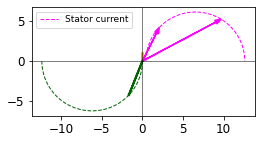

In [38]:
plt.figure(103,figsize = (4,2))
plt.rc('font', size = 12)
plt.arrow(0,0,0,1, fc ='orange', ec ='orange', lw = 2)
# plt.plot(iscim2.real,iscim2.imag, c ='magenta', ls = '--',lw = 1)
plt.plot(iscim.real,iscim.imag, c ='magenta', ls = '--',lw = 1, label = "Stator current")
# plt.plot(iscim3.real,iscim3.imag, c ='magenta', ls = '-.',lw = 1, label = "Stator current,|vr|<0")
plt.arrow(0,0,iscim[200].real,iscim[200].imag, fc ='magenta', ec = 'magenta', lw = 1.5, length_includes_head = True, head_width = 0.5)
plt.arrow(0,0,iscim[900].real,iscim[900].imag, fc ='magenta', ec = 'magenta', lw = 1.5, length_includes_head = True, head_width = 0.5)
# plt.plot(Sscim.real,Sscim.imag, c ='r', lw = 1)
# plt.arrow(0,0,vra[200].real,vra[200].imag, ec ='r', fc = 'r',lw = 2)
plt.plot(ircim.real,ircim.imag,ls = '--', c ='darkgreen',lw = 1)
plt.arrow(0,0,ircim[200].real,ircim[200].imag, ec ='darkgreen',fc = 'darkgreen',lw = 2)
# plt.plot(Ssa.real,Ssa.imag, c ='blue',lw = 2)
# plt.plot(Sra.real,Sra.imag, c ='navy',lw = 2)
# plt.xlim(-1.1,1.1)
# plt.ylim(-1.1,1.1)
plt.axhline(0, c = 'k', lw = 0.5)
plt.axvline(0, c = 'k', lw = 0.5)
plt.legend(loc = 'upper left', fontsize = 9)
# plt.savefig(dirfig2 + "DFIMzerovr.pdf", transparent = True, bbox_inches = 'tight')


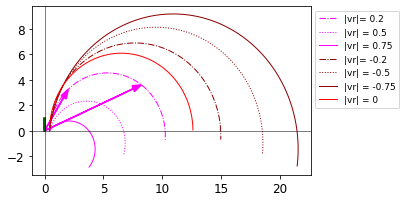

In [39]:
plt.figure(105,figsize = (5,3.1))
plt.rc('font', size = 12)
plt.arrow(0,0,0,1, fc ='orange', ec ='orange', lw = 2)
# plt.plot(iscim2.real,iscim2.imag, c ='magenta', ls = '--',lw = 1)
# plt.plot(iscim.real,iscim.imag, c ='magenta', ls = '--',lw = 1, label = "Stator current")
plt.plot(iscim3.real,iscim3.imag, c ='magenta', ls = '-.',lw = 1, label = "|vr|= 0.2")
plt.plot(iscim4.real,iscim4.imag, c ='magenta', ls = ':',lw = 1, label = "|vr| = 0.5")
plt.plot(iscim5.real,iscim5.imag, c ='magenta', ls = '-',lw = 1, label = "|vr| = 0.75")
plt.arrow(0,0,iscim3[200].real,iscim3[200].imag, fc ='magenta', ec = 'magenta', lw = 1.5, length_includes_head = True, head_width = 0.5)
plt.arrow(0,0,iscim3[900].real,iscim3[900].imag, fc ='magenta', ec = 'magenta', lw = 1.5, length_includes_head = True, head_width = 0.5)
# plt.plot(Sscim.real,Sscim.imag, c ='r', lw = 1)
plt.plot(iscim6.real,iscim6.imag, c ='darkred', ls = '-.',lw = 1, label = "|vr|= -0.2")
plt.plot(iscim7.real,iscim7.imag, c ='darkred', ls = ':',lw = 1, label = "|vr| = -0.5")
plt.plot(iscim8.real,iscim8.imag, c ='darkred', ls = '-',lw = 1, label = "|vr| = -0.75")

plt.plot(iscim.real,iscim.imag, c ='r',lw = 1, label = "|vr| = 0")
# plt.arrow(0,0,vra[200].real,vra[200].imag, ec ='r', fc = 'r',lw = 2)
# plt.plot(ircim.real,ircim.imag,ls = '--', c ='darkgreen',lw = 1)
plt.arrow(0,0,vrcim3[200].real,vrcim3[200].imag, ec ='darkgreen',fc = 'darkgreen',lw = 2)
# plt.plot(Ssa.real,Ssa.imag, c ='blue',lw = 2)
# plt.plot(Sra.real,Sra.imag, c ='navy',lw = 2)
# plt.xlim(-1.1,1.1)
# plt.ylim(-1.1,1.1)
plt.axhline(0, c = 'k', lw = 0.5)
plt.axvline(0, c = 'k', lw = 0.5)
plt.legend(loc = 'upper left', fontsize = 9, bbox_to_anchor = (1.0,1.00))
# plt.savefig(dirfig2 + "DFIMzerovr.pdf", transparent = True, bbox_inches = 'tight')
# plt.savefig(dirfig2 + "DFIMvrch.pdf", transparent = True, bbox_inches = 'tight')

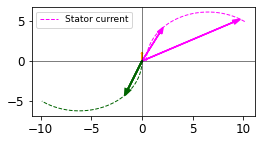

In [40]:
plt.figure(1032,figsize = (4,2))
plt.rc('font', size = 12)
plt.arrow(0,0,0,1, fc ='orange', ec ='orange', lw = 2)
plt.plot(iscim2.real,iscim2.imag, c ='magenta', ls = '--',lw = 1, label = "Stator current")
# plt.plot(iscim.real,iscim.imag, c ='magenta', ls = '--',lw = 1, label = "Stator current")
plt.arrow(0,0,iscim2[200].real,iscim2[200].imag, fc ='magenta', ec = 'magenta', lw = 1.5, length_includes_head = True, head_width = 0.5)
plt.arrow(0,0,iscim2[900].real,iscim2[900].imag, fc ='magenta', ec = 'magenta', lw = 1.5, length_includes_head = True, head_width = 0.5)
# plt.plot(Sscim.real,Sscim.imag, c ='r', lw = 1)
# plt.arrow(0,0,vra[200].real,vra[200].imag, ec ='r', fc = 'r',lw = 2)
plt.plot(ircim2.real,ircim2.imag,ls = '--', c ='darkgreen',lw = 1)
plt.arrow(0,0,ircim2[200].real,ircim2[200].imag, ec ='darkgreen',fc = 'darkgreen',lw = 2,length_includes_head = True, head_width = 0.5)
# plt.plot(Ssa.real,Ssa.imag, c ='blue',lw = 2)
# plt.plot(Sra.real,Sra.imag, c ='navy',lw = 2)
# plt.xlim(-1.1,1.1)
# plt.ylim(-1.1,1.1)
plt.axhline(0, c = 'k', lw = 0.5)
plt.axvline(0, c = 'k', lw = 0.5)
plt.legend(loc = 'upper left', fontsize = 9)
# plt.savefig(dirfig2 + "DFIMzerovrs01.pdf", transparent = True, bbox_inches = 'tight')
# plt.savefig(dirfig2 + "DFIMzerovrs0p.pdf", transparent = True, bbox_inches = 'tight')

### Power Variations with slip

In [41]:
ss = np.arange(-1.0,1.0,0.001)
rang0 = pi/10
rang = np.arange(0,2*pi,0.01)
sx = -0.3
irs = np.zeros(len(ss), dtype = complex)
iss = np.zeros(len(ss), dtype = complex)
Pss = np.zeros(len(ss))
Prs = np.zeros(len(ss))

for ii,sn in enumerate(ss):
    vs = complex(0,1.0)
    ws = 1.0
    vrrx = cmath.rect(sn*(lh/ls),rangn)/sn
    zr = complex(rr/sn,ws*sig*lr)
    #------------------------
    irs[ii] = (vrrx - vs*lh/ls)/zr
    iss[ii] = vs/complex(0,ws*ls) - lh*irs[ii]/ls
#------------------------------------------
    #stator power 
    Sss = np.conj(vs)*iss[ii]
    Pss[ii] = Sss.real
    Srs = np.conj(vrrx)*irs[ii]
    Prs[ii] = Srs.real

C:\Users\eleamk\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


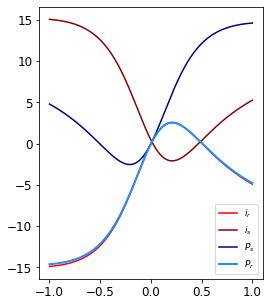

In [42]:
plt.figure(212, figsize = (4,5))
plt.rc('font', size =12)
plt.plot(ss,irs,c = 'r', lw =1.5, label =r"$i_{r}$")
# plt.plot(ss,np.angle(irs),c = 'darkred', lw =1.5, label =r"$i_{r}$angle")
plt.plot(ss,iss,c = 'darkred', lw =1.5, label =r"$i_{s}$")
plt.plot(ss,Pss,c = 'navy', lw =1.5, label =r"$P_{s}$")
plt.plot(ss,Prs,c = 'dodgerblue', lw =2, label =r"$P_{r}$")
plt.legend(loc = 'lower right', fontsize = 9)
plt.show()